# LMS in Sensor Network
 This is my first jupyter notebook example on Distributed LMS on sensor network.
 
 Statinary Data Model: $Y_i = X^o +N_i$;
 
 where $Y_i$ is the network noisy measurement data, 
 
$X^o$ is the true network signal to be estimate and 

$N_i$ is a zero mean gaussian noise.

# Importing Classes and Packages

In [63]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from matplotlib import collections as mc
from matplotlib import lines
from numpy import linalg as la
import numpy.matlib as mat
from scipy.spatial.distance  import pdist, squareform# Function to find the Euclidean distance between Node

## import my class
from NetworkClasses import Local as Local
from NetworkClasses import Network as Network
from SPClasses import GF as gf

# Import the FakeNet Data

ColName    = ['Latitude','Longitude','Height']
faultName  =['StartLat','StartLong','EndLat','EndLong']
StationLocation = pd.read_excel('../fakenet_filesIntern/fakenet.xlsx',sheetname=0,header=None,skiprows=1,names = ColName)
LatSeries  = pd.read_excel('../fakenet_filesIntern/fakenet.xlsx',sheetname=1,header=None,skiprows=1)
LongSeries = pd.read_excel('../fakenet_filesIntern/fakenet.xlsx',sheetname=2,header=None,skiprows=1)
faultpos = pd.read_excel('../fakenet_filesIntern/fakenet.xlsx',sheetname=3,header=None,names=faultName)
                           
LatSlip  = LatSeries.iloc[-1].values
LongSlip = LongSeries.iloc[-1].values
LatPos = StationLocation['Latitude'].values
LongPos = StationLocation['Longitude'].values
NodePosition = np.c_[LatPos,LongPos]

Startfault= np.array(faultpos.iloc[:,[0,2]])
Endfault = np.array(faultpos.iloc[:,[1,3]])

fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(StationLocation['Latitude'],StationLocation['Longitude'],'o',alpha = -0.3)
plt.quiver(StationLocation['Latitude'], StationLocation['Longitude'], LatSlip, LongSlip)
for i in range(len(Startfault)):
  plt.plot(Startfault[i,:],Endfault[i,:])
ax.annotate('Slip Event', xy=(Startfault[0,1],Endfault[0,1]) , xytext=(Startfault[0,1]-0.2,Endfault[0,1]+0.01) , arrowprops=dict(color='red', shrink = 1,headwidth=7,width=1),)
plt.title('Slip Event')

plt.show()

# Import Synthetic Network

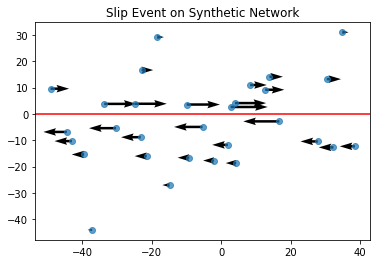

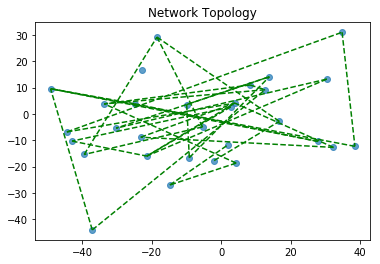

In [47]:
synColName = ['Latitude','Longitude','Slip'] 
StationLocation= pd.read_csv('Data/GPS.csv',sep=',',header=None,names = synColName)
L = np.mat(pd.read_csv('Data/GPSAdjacency.csv',sep=',',header=None))
Slip = StationLocation['Slip']
#fig = plt.figure()
N = len(StationLocation)
#ax = fig.add_subplot(111)
plt.plot(StationLocation['Latitude'],StationLocation['Longitude'],'o',alpha = -0.3)
plt.quiver(StationLocation['Latitude'],StationLocation['Longitude'],Slip,np.zeros(N))
plt.axhline(0, color='red')
#ax.annotate('Slip Event', xy=(30,0) , xytext=(38,8) , arrowprops=dict(color='blue', shrink = 1,headwidth=7,width=1),)
plt.title('Slip Event on Synthetic Network')
### Plotting the Edges form Adjacency 
plt.show()
plt.plot(StationLocation['Latitude'],StationLocation['Longitude'],'o',alpha = -0.3)
for i in range(N-1):
    for j in range(i+1,N-1):
        if L[i,j]!=0:
            x = [StationLocation['Latitude'][i],StationLocation['Latitude'][j]]
            y = [StationLocation['Longitude'][i],StationLocation['Longitude'][j]]
            plt.plot(x,y,'g--')
#plt.subplot(1,2,2)
#plt.plot(StationLocation['Latitude'],StationLocation['Longitude'],'o',alpha = -0.3)
plt.title('Network Topology')
plt.show()

# Main Program

In [64]:
Network.Network(N,L)

NameError: name 'mat' is not defined

In [65]:
mat.absolute

<ufunc 'absolute'>